In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm



# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Prepare training dataset

In [3]:
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)


In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:02, 45.57it/s]                         


Epoch 1 of 100
Generator loss: 1.22571258, Discriminator loss: 0.96694188


118it [00:02, 45.31it/s]                         


Epoch 2 of 100
Generator loss: 1.54911422, Discriminator loss: 1.28986308


118it [00:02, 47.52it/s]                         


Epoch 3 of 100
Generator loss: 2.59195691, Discriminator loss: 1.10263670


118it [00:02, 47.02it/s]                         


Epoch 4 of 100
Generator loss: 3.77850170, Discriminator loss: 0.95504564


118it [00:02, 46.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


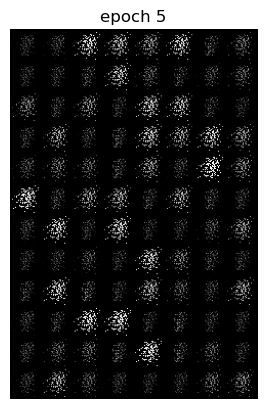

Epoch 5 of 100
Generator loss: 4.90009453, Discriminator loss: 0.56880778


118it [00:02, 47.14it/s]                         


Epoch 6 of 100
Generator loss: 2.15376080, Discriminator loss: 1.07901047


118it [00:02, 46.30it/s]                         


Epoch 7 of 100
Generator loss: 2.47685109, Discriminator loss: 0.87261109


118it [00:02, 47.51it/s]                         


Epoch 8 of 100
Generator loss: 2.15053744, Discriminator loss: 1.21073874


118it [00:02, 46.48it/s]                         


Epoch 9 of 100
Generator loss: 1.38252580, Discriminator loss: 1.23121624


118it [00:02, 44.22it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


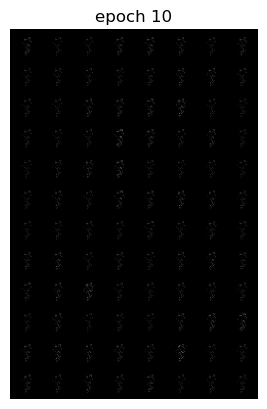

Epoch 10 of 100
Generator loss: 2.93228692, Discriminator loss: 0.84276123


118it [00:02, 47.50it/s]                         


Epoch 11 of 100
Generator loss: 1.70135460, Discriminator loss: 1.03420046


118it [00:02, 46.87it/s]                         


Epoch 12 of 100
Generator loss: 1.75708568, Discriminator loss: 0.92244090


118it [00:02, 45.06it/s]                         


Epoch 13 of 100
Generator loss: 1.71658851, Discriminator loss: 0.89747624


118it [00:02, 45.23it/s]                         


Epoch 14 of 100
Generator loss: 1.57052482, Discriminator loss: 0.99688705


118it [00:02, 45.56it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


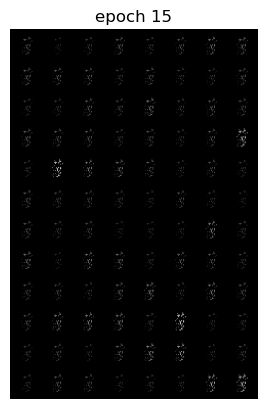

Epoch 15 of 100
Generator loss: 1.33920896, Discriminator loss: 1.08737580


118it [00:02, 47.12it/s]                         


Epoch 16 of 100
Generator loss: 1.86814823, Discriminator loss: 0.91185595


118it [00:02, 45.08it/s]                         


Epoch 17 of 100
Generator loss: 1.92948733, Discriminator loss: 1.11049640


118it [00:02, 46.55it/s]                         


Epoch 18 of 100
Generator loss: 1.51465359, Discriminator loss: 0.85681532


118it [00:02, 47.42it/s]                         


Epoch 19 of 100
Generator loss: 1.95316156, Discriminator loss: 1.00907088


118it [00:02, 45.58it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


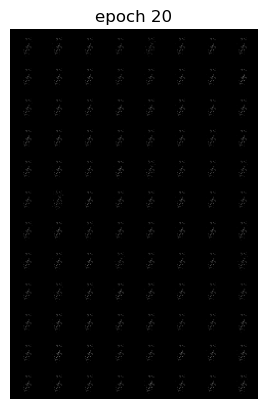

Epoch 20 of 100
Generator loss: 2.35802383, Discriminator loss: 0.77474237


118it [00:02, 46.15it/s]                         


Epoch 21 of 100
Generator loss: 2.37949071, Discriminator loss: 0.68309296


118it [00:02, 47.29it/s]                         


Epoch 22 of 100
Generator loss: 2.34730011, Discriminator loss: 0.73075310


118it [00:02, 44.88it/s]                         


Epoch 23 of 100
Generator loss: 2.19935881, Discriminator loss: 0.80311288


118it [00:02, 45.95it/s]                         


Epoch 24 of 100
Generator loss: 2.18360254, Discriminator loss: 0.60422702


118it [00:02, 47.52it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


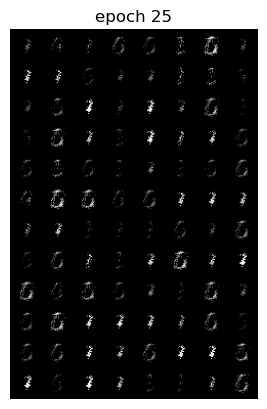

Epoch 25 of 100
Generator loss: 2.20579389, Discriminator loss: 0.70217212


118it [00:02, 45.46it/s]                         


Epoch 26 of 100
Generator loss: 1.74340464, Discriminator loss: 0.81808203


118it [00:02, 45.87it/s]                         


Epoch 27 of 100
Generator loss: 1.42302835, Discriminator loss: 1.00471360


118it [00:02, 47.05it/s]                         


Epoch 28 of 100
Generator loss: 1.87156617, Discriminator loss: 0.64368057


118it [00:02, 46.76it/s]                         


Epoch 29 of 100
Generator loss: 2.75689024, Discriminator loss: 0.51764329


118it [00:02, 46.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


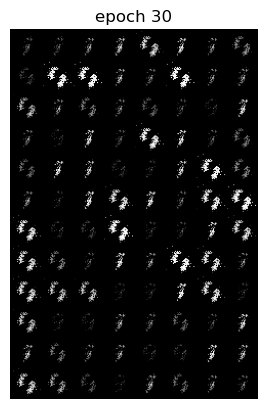

Epoch 30 of 100
Generator loss: 2.69277571, Discriminator loss: 0.64431525


118it [00:02, 46.75it/s]                         


Epoch 31 of 100
Generator loss: 2.50761583, Discriminator loss: 0.69743974


118it [00:02, 45.67it/s]                         


Epoch 32 of 100
Generator loss: 2.14555594, Discriminator loss: 0.61915290


118it [00:02, 46.96it/s]                         


Epoch 33 of 100
Generator loss: 2.80113438, Discriminator loss: 0.43936061


118it [00:02, 45.67it/s]                         


Epoch 34 of 100
Generator loss: 2.68972504, Discriminator loss: 0.57783112


118it [00:02, 44.57it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


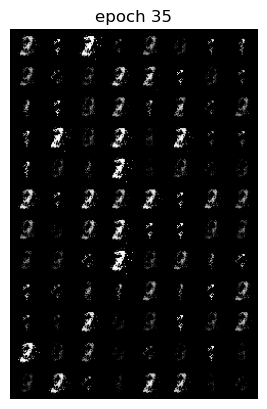

Epoch 35 of 100
Generator loss: 2.43749472, Discriminator loss: 0.52630308


118it [00:02, 45.46it/s]                         


Epoch 36 of 100
Generator loss: 2.64377291, Discriminator loss: 0.51526009


118it [00:02, 46.39it/s]                         


Epoch 37 of 100
Generator loss: 2.50160293, Discriminator loss: 0.60562635


118it [00:02, 47.44it/s]                         


Epoch 38 of 100
Generator loss: 2.06340911, Discriminator loss: 0.72775486


118it [00:02, 45.45it/s]                         


Epoch 39 of 100
Generator loss: 2.26697544, Discriminator loss: 0.65189677


118it [00:02, 47.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


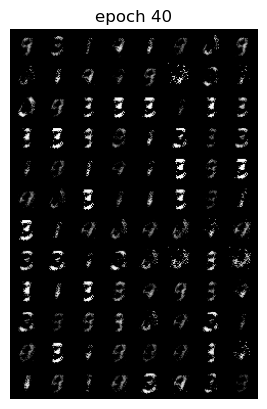

Epoch 40 of 100
Generator loss: 2.41127666, Discriminator loss: 0.61754582


118it [00:02, 47.35it/s]                         


Epoch 41 of 100
Generator loss: 2.21802726, Discriminator loss: 0.61619242


118it [00:02, 46.42it/s]                         


Epoch 42 of 100
Generator loss: 2.40605231, Discriminator loss: 0.64311061


118it [00:02, 46.25it/s]                         


Epoch 43 of 100
Generator loss: 2.55204962, Discriminator loss: 0.55270990


118it [00:02, 46.63it/s]                         


Epoch 44 of 100
Generator loss: 2.64208208, Discriminator loss: 0.52176043


118it [00:02, 47.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


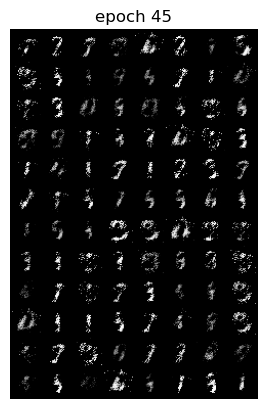

Epoch 45 of 100
Generator loss: 2.67804245, Discriminator loss: 0.54220843


118it [00:02, 45.63it/s]                         


Epoch 46 of 100
Generator loss: 2.60722069, Discriminator loss: 0.53854084


118it [00:02, 46.09it/s]                         


Epoch 47 of 100
Generator loss: 2.75335163, Discriminator loss: 0.46981502


118it [00:02, 44.44it/s]                         


Epoch 48 of 100
Generator loss: 3.09583948, Discriminator loss: 0.50397607


118it [00:02, 44.68it/s]                         


Epoch 49 of 100
Generator loss: 2.52536820, Discriminator loss: 0.61500959


118it [00:02, 46.20it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


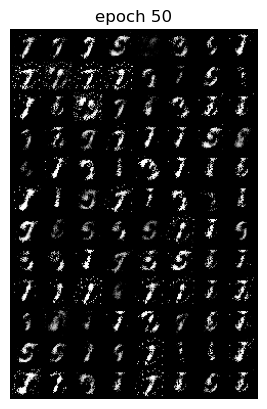

Epoch 50 of 100
Generator loss: 2.93280685, Discriminator loss: 0.42236178


118it [00:02, 45.28it/s]                         


Epoch 51 of 100
Generator loss: 3.21727954, Discriminator loss: 0.40173669


118it [00:02, 44.37it/s]                         


Epoch 52 of 100
Generator loss: 2.68213975, Discriminator loss: 0.51850629


118it [00:02, 46.41it/s]                         


Epoch 53 of 100
Generator loss: 2.65477124, Discriminator loss: 0.54764619


118it [00:02, 45.96it/s]                         


Epoch 54 of 100
Generator loss: 2.51300364, Discriminator loss: 0.52175003


118it [00:02, 46.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


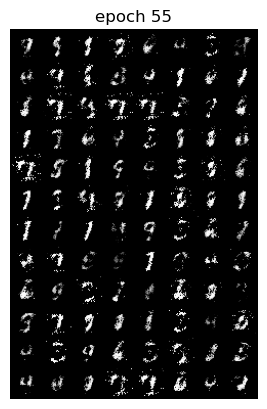

Epoch 55 of 100
Generator loss: 2.63615399, Discriminator loss: 0.59091425


118it [00:02, 46.55it/s]                         


Epoch 56 of 100
Generator loss: 2.42056709, Discriminator loss: 0.60383114


118it [00:02, 47.09it/s]                         


Epoch 57 of 100
Generator loss: 2.58488265, Discriminator loss: 0.58352324


118it [00:02, 46.44it/s]                         


Epoch 58 of 100
Generator loss: 2.61191102, Discriminator loss: 0.61090970


118it [00:02, 45.95it/s]                         


Epoch 59 of 100
Generator loss: 2.34338930, Discriminator loss: 0.61337310


118it [00:02, 45.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


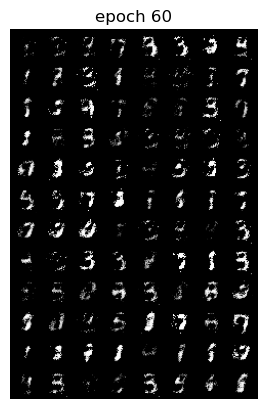

Epoch 60 of 100
Generator loss: 2.39150092, Discriminator loss: 0.62197092


118it [00:02, 47.45it/s]                         


Epoch 61 of 100
Generator loss: 2.49235097, Discriminator loss: 0.58231684


118it [00:02, 47.43it/s]                         


Epoch 62 of 100
Generator loss: 2.47841218, Discriminator loss: 0.59629610


118it [00:02, 43.80it/s]                         


Epoch 63 of 100
Generator loss: 2.53256227, Discriminator loss: 0.58843360


118it [00:02, 45.38it/s]                         


Epoch 64 of 100
Generator loss: 2.57410123, Discriminator loss: 0.58176764


118it [00:02, 45.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


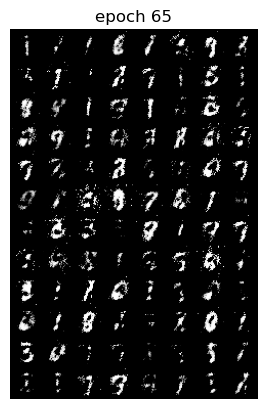

Epoch 65 of 100
Generator loss: 2.73909711, Discriminator loss: 0.52208352


118it [00:02, 45.30it/s]                         


Epoch 66 of 100
Generator loss: 2.54748103, Discriminator loss: 0.57279272


118it [00:02, 46.80it/s]                         


Epoch 67 of 100
Generator loss: 2.33795477, Discriminator loss: 0.63509541


118it [00:02, 46.98it/s]                         


Epoch 68 of 100
Generator loss: 2.25781180, Discriminator loss: 0.67574591


118it [00:02, 45.30it/s]                         


Epoch 69 of 100
Generator loss: 2.29460805, Discriminator loss: 0.65721945


118it [00:02, 44.50it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


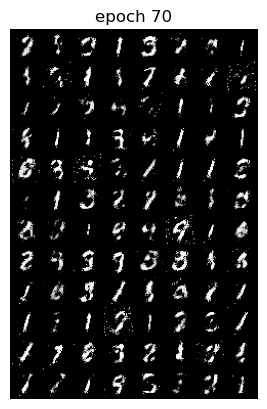

Epoch 70 of 100
Generator loss: 2.35453455, Discriminator loss: 0.61969939


118it [00:02, 47.35it/s]                         


Epoch 71 of 100
Generator loss: 2.35059855, Discriminator loss: 0.64282490


118it [00:02, 47.21it/s]                         


Epoch 72 of 100
Generator loss: 2.37699712, Discriminator loss: 0.62538679


118it [00:02, 45.55it/s]                         


Epoch 73 of 100
Generator loss: 2.32648220, Discriminator loss: 0.64563026


118it [00:02, 46.94it/s]                         


Epoch 74 of 100
Generator loss: 2.43164622, Discriminator loss: 0.61691934


118it [00:02, 45.83it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


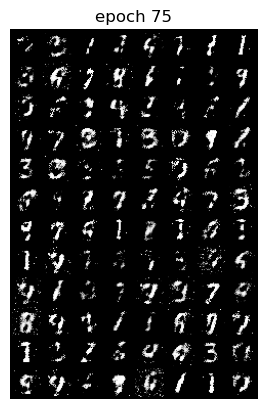

Epoch 75 of 100
Generator loss: 2.47126861, Discriminator loss: 0.60330086


118it [00:02, 44.86it/s]                         


Epoch 76 of 100
Generator loss: 2.47282934, Discriminator loss: 0.61241017


118it [00:02, 46.83it/s]                         


Epoch 77 of 100
Generator loss: 2.48553488, Discriminator loss: 0.60886279


118it [00:02, 46.72it/s]                         


Epoch 78 of 100
Generator loss: 2.37488523, Discriminator loss: 0.62177083


118it [00:02, 47.54it/s]                         


Epoch 79 of 100
Generator loss: 2.24281532, Discriminator loss: 0.67972266


118it [00:02, 46.27it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


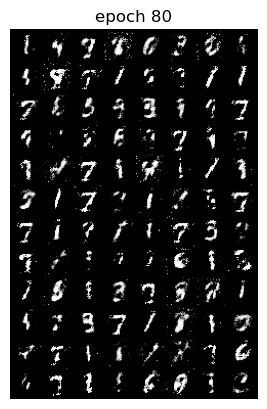

Epoch 80 of 100
Generator loss: 2.30902637, Discriminator loss: 0.65597761


118it [00:02, 44.25it/s]                         


Epoch 81 of 100
Generator loss: 2.28716025, Discriminator loss: 0.64003585


118it [00:02, 46.76it/s]                         


Epoch 82 of 100
Generator loss: 2.29732914, Discriminator loss: 0.65581827


118it [00:02, 46.02it/s]                         


Epoch 83 of 100
Generator loss: 2.38030816, Discriminator loss: 0.65284379


118it [00:02, 44.55it/s]                         


Epoch 84 of 100
Generator loss: 2.22367699, Discriminator loss: 0.69447481


118it [00:02, 46.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


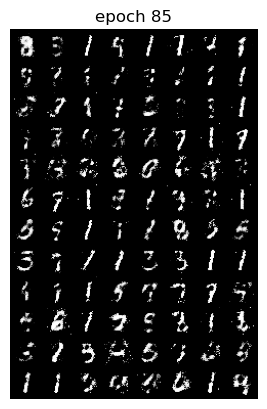

Epoch 85 of 100
Generator loss: 2.30517727, Discriminator loss: 0.66844250


118it [00:02, 45.57it/s]                         


Epoch 86 of 100
Generator loss: 2.11247672, Discriminator loss: 0.73787783


118it [00:02, 47.60it/s]                         


Epoch 87 of 100
Generator loss: 2.13270472, Discriminator loss: 0.72663556


118it [00:02, 46.91it/s]                         


Epoch 88 of 100
Generator loss: 2.13462251, Discriminator loss: 0.71778449


118it [00:02, 44.11it/s]                         


Epoch 89 of 100
Generator loss: 2.14950964, Discriminator loss: 0.71564175


118it [00:02, 45.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


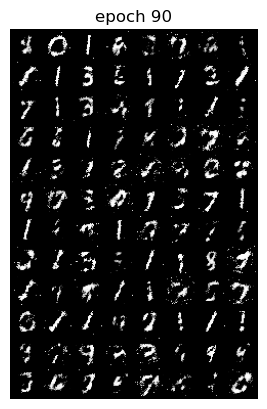

Epoch 90 of 100
Generator loss: 2.14719544, Discriminator loss: 0.67252934


118it [00:02, 46.72it/s]                         


Epoch 91 of 100
Generator loss: 2.09007188, Discriminator loss: 0.73619594


118it [00:02, 45.08it/s]                         


Epoch 92 of 100
Generator loss: 1.85341199, Discriminator loss: 0.82054092


118it [00:02, 44.60it/s]                         


Epoch 93 of 100
Generator loss: 1.96370436, Discriminator loss: 0.79609337


118it [00:02, 46.74it/s]                         


Epoch 94 of 100
Generator loss: 1.86965240, Discriminator loss: 0.81301383


118it [00:02, 46.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


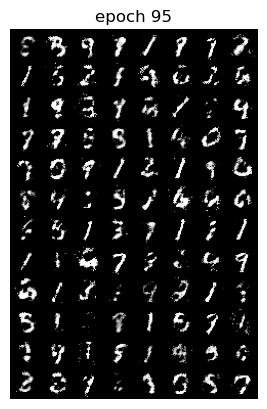

Epoch 95 of 100
Generator loss: 1.98736788, Discriminator loss: 0.78141324


118it [00:02, 47.27it/s]                         


Epoch 96 of 100
Generator loss: 1.88722556, Discriminator loss: 0.79674841


118it [00:02, 46.46it/s]                         


Epoch 97 of 100
Generator loss: 1.93458552, Discriminator loss: 0.78022539


118it [00:02, 45.23it/s]                         


Epoch 98 of 100
Generator loss: 1.87994477, Discriminator loss: 0.80139769


118it [00:02, 45.13it/s]                         


Epoch 99 of 100
Generator loss: 1.85901009, Discriminator loss: 0.81611515


118it [00:02, 47.28it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


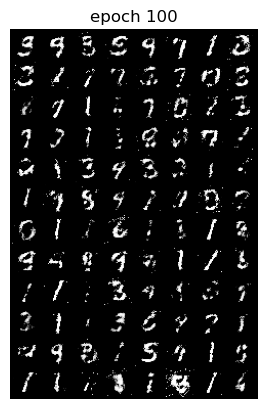

Epoch 100 of 100
Generator loss: 1.92426494, Discriminator loss: 0.79224230


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):

    loss = criterion(output, true_label)
    
    return loss
def discriminator_loss(output, true_label):

    loss_real_image = criterion(output[0], true_label[0])
    loss_fake_image = criterion(output[1], true_label[1])
    
    return loss_real_image + loss_fake_image
epochs = 200
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # Training discriminator
        real_images = data[0].to(device)
        batch_size = real_images.size(0)
        
        
        # Sample batch_size noise samples of dimension nz
        noise = create_noise(batch_size, nz)
        
        discriminate_real_images = discriminator(real_images)
        fake_images = generator(noise).to(device)
        discriminate_fake_images = discriminator(fake_images)

        # label the images
        real_label = label_real(batch_size)
        fake_label = label_fake(batch_size)

        # Set output and labels to pass to the loss function
        output = (discriminate_real_images, discriminate_fake_images)
        true_label = (real_label, fake_label)
        loss_d_ = discriminator_loss(output, true_label)
        

        ## Zero the grad
        optim_d.zero_grad()
        ## Backpropagate the loss
        loss_d_.backward()
        ## Update the weights
        optim_d.step()

        # Train the generator for k = 1 step
        # Sample new noise
        noise = create_noise(batch_size, nz)
        # Generate fake images
        fake_images = generator(noise).to(device)
        # Discriminate fake images
        discriminate_fake_images = discriminator(fake_images)
        # Get the generative loss
        loss_g_ = generator_loss(discriminate_fake_images, real_label)



        ## Zero the grad
        optim_g.zero_grad()
        ## Backpropagate the loss
        loss_g_.backward()
        ## Update the weights
        optim_g.step()

        loss_g += loss_g_.item()
        loss_d += loss_d_.item()

    
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}_200.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator_200.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images_200.gif', imgs)

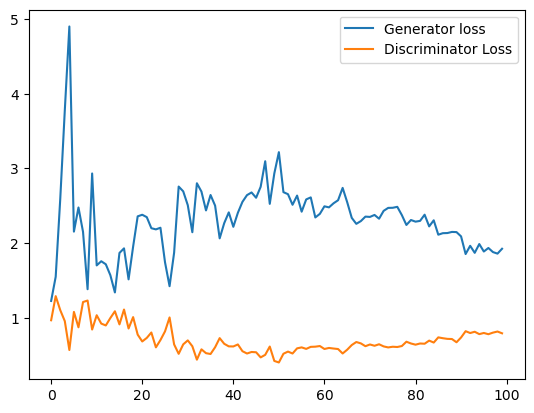

In [17]:
import numpy as np

# move each item in losses_g to cpu and convert to numpy array
# losses_g = [item.cpu().detach().numpy().item() for item in losses_g]
# losses_d = [item.cpu().detach().numpy().item() for item in losses_d]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss_200.png')

### 1b. Modifying Loss to show vanishing gradients



118it [00:02, 46.00it/s]                         


Epoch 1 of 100
Generator loss: 0.05846024, Discriminator loss: 0.08324554


118it [00:02, 48.33it/s]                         


Epoch 2 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.24it/s]                         


Epoch 3 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.96it/s]                         


Epoch 4 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.15it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


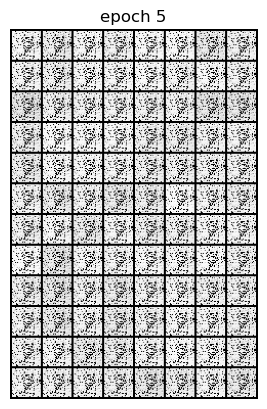

Epoch 5 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.24it/s]                         


Epoch 6 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.02it/s]                         


Epoch 7 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.87it/s]                         


Epoch 8 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.65it/s]                         


Epoch 9 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.07it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


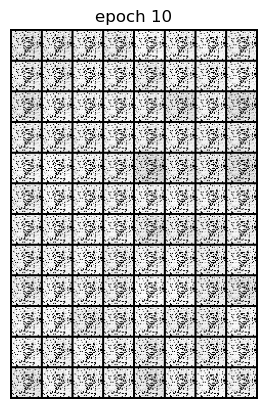

Epoch 10 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.43it/s]                         


Epoch 11 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.26it/s]                         


Epoch 12 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.30it/s]                         


Epoch 13 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.44it/s]                         


Epoch 14 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.65it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


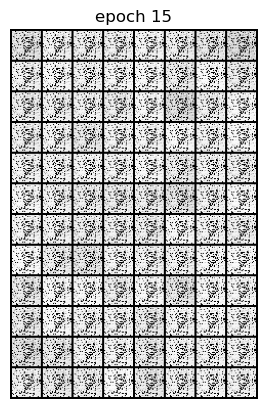

Epoch 15 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.46it/s]                         


Epoch 16 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.52it/s]                         


Epoch 17 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.46it/s]                         


Epoch 18 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.19it/s]                         


Epoch 19 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.93it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


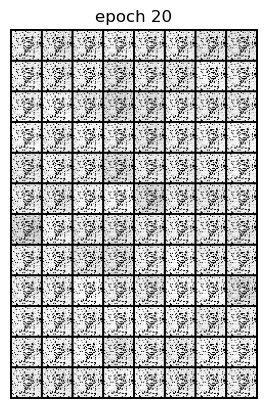

Epoch 20 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.71it/s]                         


Epoch 21 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.10it/s]                         


Epoch 22 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.86it/s]                         


Epoch 23 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.70it/s]                         


Epoch 24 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.26it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


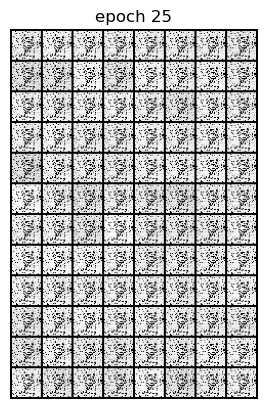

Epoch 25 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.52it/s]                         


Epoch 26 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.81it/s]                         


Epoch 27 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.84it/s]                         


Epoch 28 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.36it/s]                         


Epoch 29 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.96it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


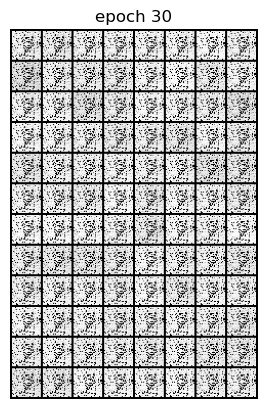

Epoch 30 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.81it/s]                         


Epoch 31 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.43it/s]                         


Epoch 32 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.44it/s]                         


Epoch 33 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.58it/s]                         


Epoch 34 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.97it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


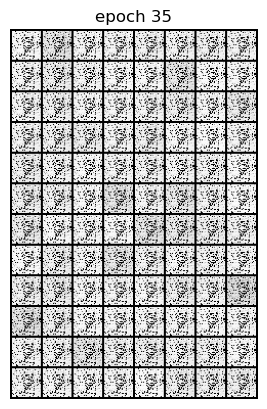

Epoch 35 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.55it/s]                         


Epoch 36 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.60it/s]                         


Epoch 37 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.98it/s]                         


Epoch 38 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.85it/s]                         


Epoch 39 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.14it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


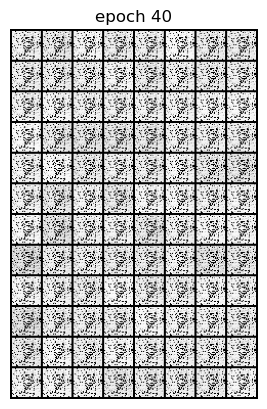

Epoch 40 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.88it/s]                         


Epoch 41 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.98it/s]                         


Epoch 42 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.17it/s]                         


Epoch 43 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.27it/s]                         


Epoch 44 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.33it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


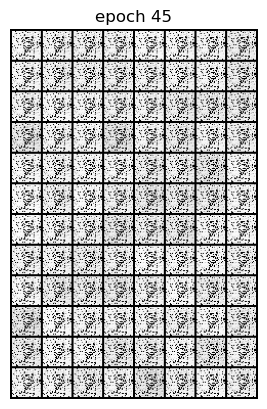

Epoch 45 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 45.95it/s]                         


Epoch 46 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.55it/s]                         


Epoch 47 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.46it/s]                         


Epoch 48 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.53it/s]                         


Epoch 49 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.30it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


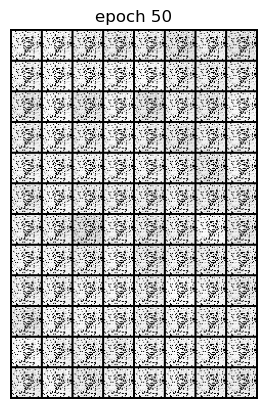

Epoch 50 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.66it/s]                         


Epoch 51 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.91it/s]                         


Epoch 52 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.98it/s]                         


Epoch 53 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.32it/s]                         


Epoch 54 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.82it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


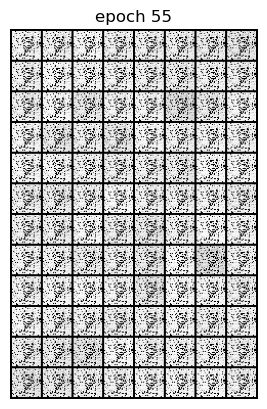

Epoch 55 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.13it/s]                         


Epoch 56 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.85it/s]                         


Epoch 57 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.09it/s]                         


Epoch 58 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.07it/s]                         


Epoch 59 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.68it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


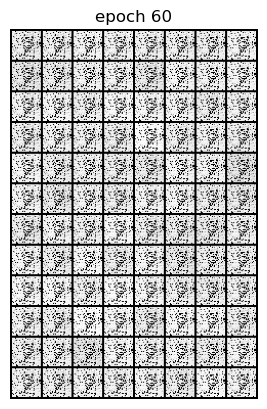

Epoch 60 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.99it/s]                         


Epoch 61 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.82it/s]                         


Epoch 62 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.33it/s]                         


Epoch 63 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.26it/s]                         


Epoch 64 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.10it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


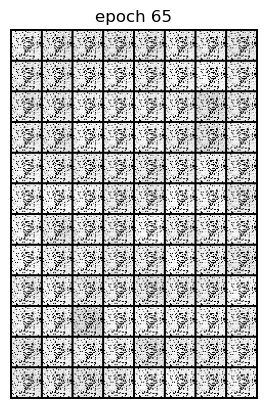

Epoch 65 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.43it/s]                         


Epoch 66 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.86it/s]                         


Epoch 67 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.75it/s]                         


Epoch 68 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.29it/s]                         


Epoch 69 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 45.53it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


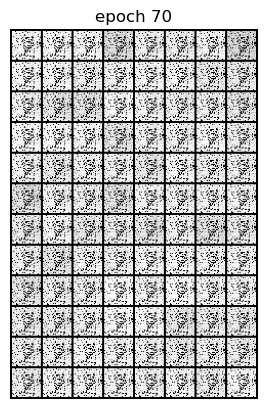

Epoch 70 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.16it/s]                         


Epoch 71 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.64it/s]                         


Epoch 72 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.15it/s]                         


Epoch 73 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.82it/s]                         


Epoch 74 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.47it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


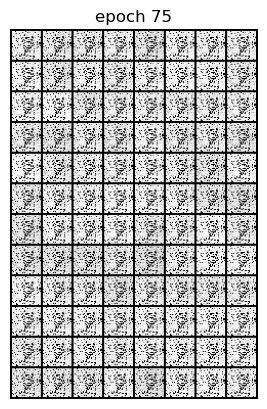

Epoch 75 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 45.06it/s]                         


Epoch 76 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.18it/s]                         


Epoch 77 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.03it/s]                         


Epoch 78 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.69it/s]                         


Epoch 79 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.99it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


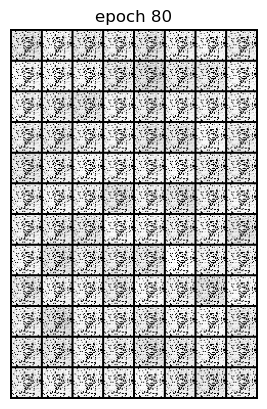

Epoch 80 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.77it/s]                         


Epoch 81 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 44.90it/s]                         


Epoch 82 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.21it/s]                         


Epoch 83 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.54it/s]                         


Epoch 84 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.88it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


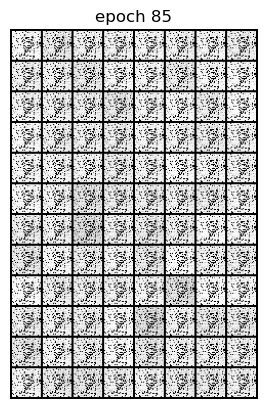

Epoch 85 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.18it/s]                         


Epoch 86 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.78it/s]                         


Epoch 87 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.50it/s]                         


Epoch 88 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.48it/s]                         


Epoch 89 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.06it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


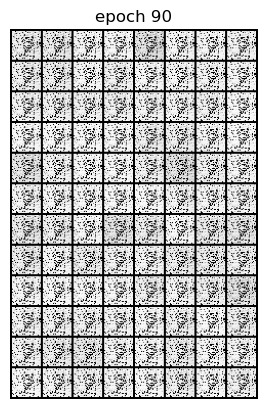

Epoch 90 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.73it/s]                         


Epoch 91 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.39it/s]                         


Epoch 92 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.35it/s]                         


Epoch 93 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 47.51it/s]                         


Epoch 94 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.11it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


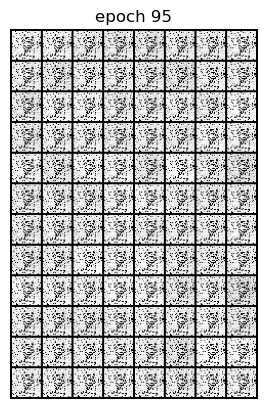

Epoch 95 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.99it/s]                         


Epoch 96 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.98it/s]                         


Epoch 97 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.02it/s]                         


Epoch 98 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 46.55it/s]                         


Epoch 99 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


118it [00:02, 48.36it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


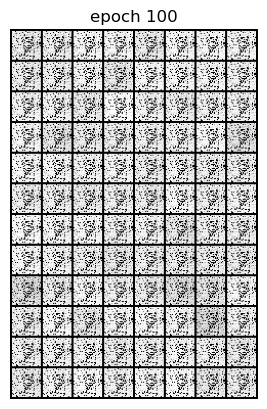

Epoch 100 of 100
Generator loss: 0.00000000, Discriminator loss: 0.00000000


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):

    loss = criterion(output, true_label)
    
    return loss
def discriminator_loss(output, true_label):

    loss_real_image = criterion(output[0], true_label[0])
    loss_fake_image = criterion(output[1], true_label[1])
    
    return loss_real_image + loss_fake_image

for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ##########
        # Training discriminator
        real_images = data[0].to(device)
        batch_size = real_images.size(0)
        
        
        # Sample batch_size noise samples of dimension nz
        noise = create_noise(batch_size, nz)
        
        discriminate_real_images = discriminator(real_images)
        fake_images = generator(noise).to(device)
        discriminate_fake_images = discriminator(fake_images)

        # label the images
        real_label = label_real(batch_size)
        fake_label = label_fake(batch_size)

        # Set output and labels to pass to the loss function
        output = (discriminate_real_images, discriminate_fake_images)
        true_label = (real_label, fake_label)
        loss_d_ = discriminator_loss(output, true_label)
        

        ## Zero the grad
        optim_d.zero_grad()
        ## Backpropagate the loss
        loss_d_.backward()
        ## Update the weights
        optim_d.step()

        # Train the generator for k = 1 step
        # Sample new noise
        noise = create_noise(batch_size, nz)
        # Generate fake images
        fake_images = generator(noise).to(device)
        # Discriminate fake images
        discriminate_fake_images = discriminator(fake_images)
        # Get the generative loss
        # ============================================
        # Here we are passing fake label
        # ============================================
        loss_g_ = generator_loss(discriminate_fake_images, fake_label)



        ## Zero the grad
        optim_g.zero_grad()
        ## Backpropagate the loss
        loss_g_.backward()
        ## Update the weights
        optim_g.step()

        loss_g += loss_g_.item()
        loss_d += loss_d_.item()

    
    
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if (epoch + 1) % 5 == 0:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs_1b/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs_1b/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs_1b/generator_images.gif', imgs)

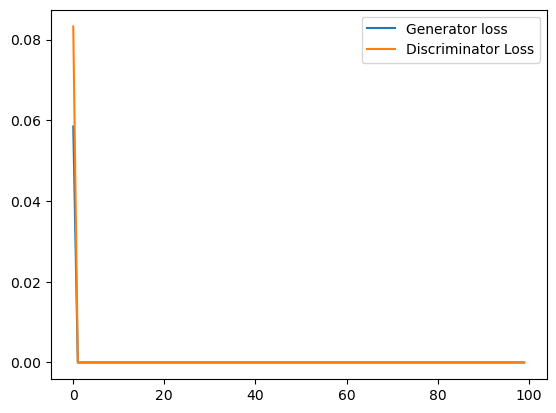

In [17]:
import numpy as np

# move each item in losses_g to cpu and convert to numpy array
# losses_g = [item.cpu().detach().numpy().item() for item in losses_g]
# losses_d = [item.cpu().detach().numpy().item() for item in losses_d]

# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs_1b/loss.png')